# Machine Learning Foundation

## Course 5, Part c: Backpropagation DEMO

## Overview
In this exercise we will use backpropagation to train a multi-layer perceptron (with a single hidden layer).  We will experiment with different patterns and see how quickly or slowly the weights converge.  We will see the impact and interplay of different parameters such as learning rate, number of iterations, and number of data points.

In [1]:
#Setup
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In this exercise, we will prepare code to create a multi-layer perceptron with a single hidden layer (with 4 nodes) and train it via back-propagation.  We will take the following steps:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Shape of x_mat_full is (500, 3), shape of y is 500


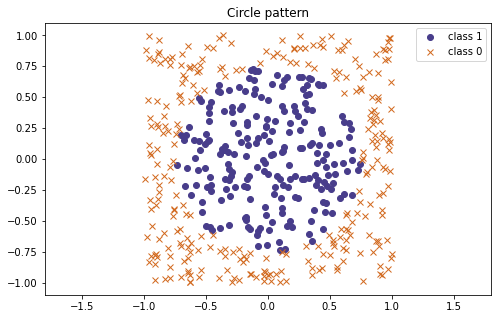


Shape of x_mat_full is (500, 3), shape of y is 500


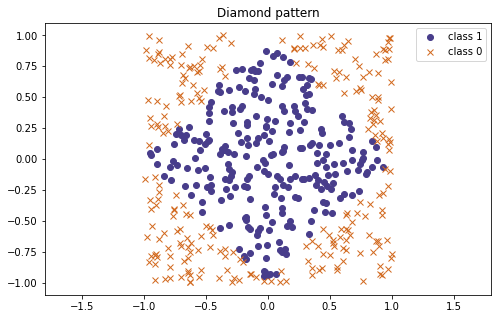


Shape of x_mat_full is (500, 3), shape of y is 500


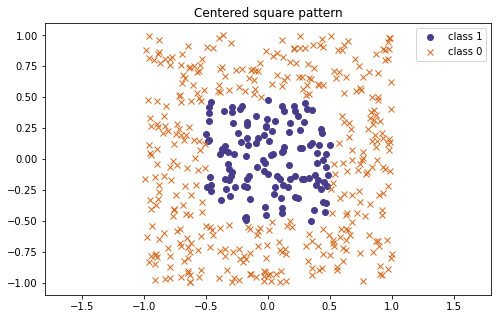


Shape of x_mat_full is (500, 3), shape of y is 500


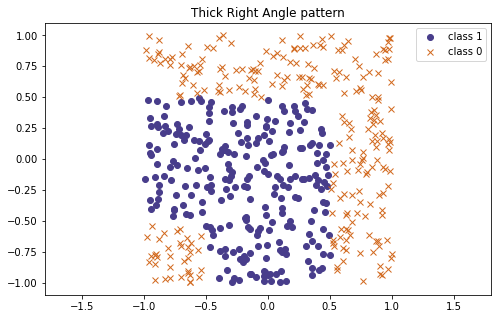


Shape of x_mat_full is (500, 3), shape of y is 500


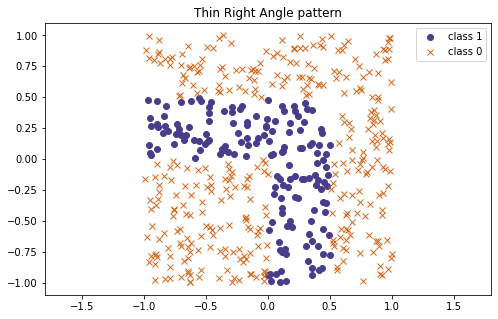

In [2]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate((x_mat_1,x_mat_bias), axis=1)

# Patterns to plot
y,pattern=[],[]

# Circle pattern
y.append((np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int).tolist())
pattern.append('Circle')

# Diamond Pattern
y.append(((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int).tolist())
pattern.append('Diamond')

# Centered square
y.append(((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int).tolist())
pattern.append('Centered square')

# Thick Right Angle pattern
y.append((((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) 
          & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int).tolist())
pattern.append('Thick Right Angle')

# Thin right angle pattern
y.append((((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) 
          & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int).tolist())
pattern.append('Thin Right Angle')

for i,j in enumerate(pattern):
    print('\nShape of x_mat_full is {}, shape of y is {}'.format(x_mat_full.shape, len(y[i])))
    y2=np.array(y[i])
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(x_mat_full[y2==1, 0],x_mat_full[y2==1, 1], 'ro', label='class 1', color='darkslateblue')
    ax.plot(x_mat_full[y2==0, 0],x_mat_full[y2==0, 1], 'bx', label='class 0', color='chocolate')
    ax.legend(loc='best')
    ax.axis('equal')
    ax.set_title('{} pattern'.format(j))
    plt.show()

Now we can train a multi-layer perceptron for each pattern above and plot the results.


Fitting Multi-Layer Perceptron for Circle shape

iteration 0, log loss = 0.7554, accuracy = 0.562
iteration 1000, log loss = 0.4766, accuracy = 0.768
iteration 2000, log loss = 0.2267, accuracy = 0.914
iteration 3000, log loss = 0.1864, accuracy = 0.932
iteration 4000, log loss = 0.1652, accuracy = 0.948


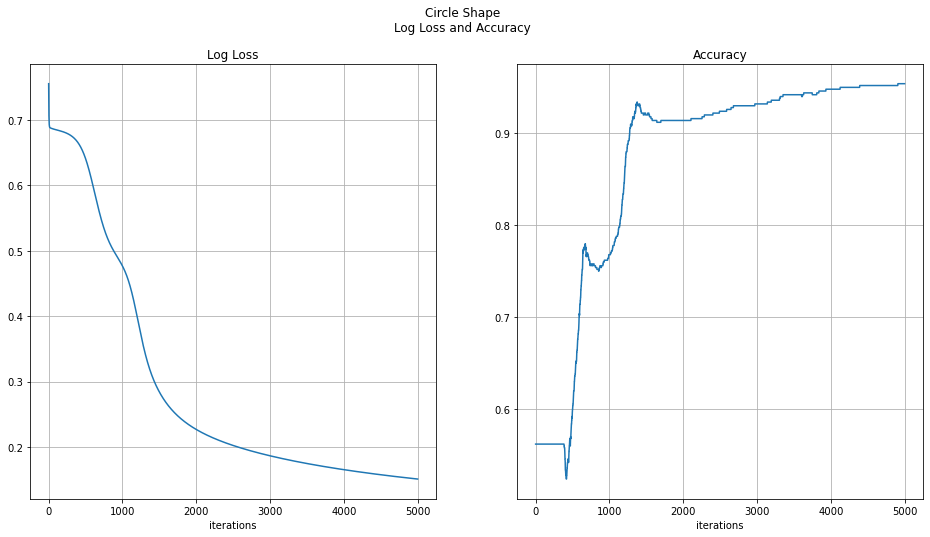

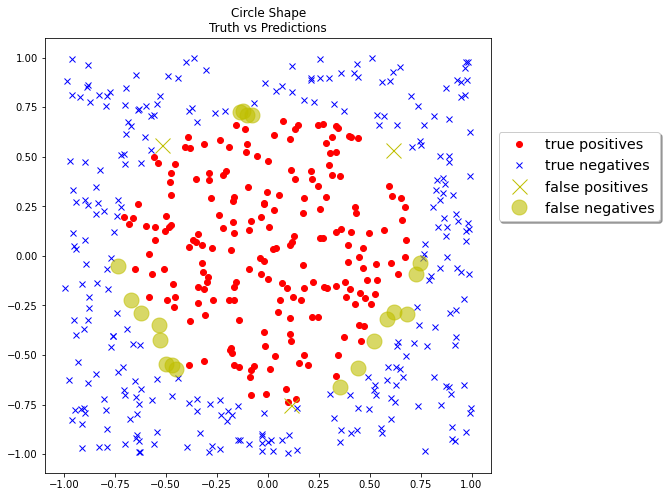

_____________________________________________________________________________________________________________

Fitting Multi-Layer Perceptron for Diamond shape

iteration 0, log loss = 0.8190, accuracy = 0.496
iteration 1000, log loss = 0.5137, accuracy = 0.756
iteration 2000, log loss = 0.3082, accuracy = 0.91
iteration 3000, log loss = 0.2013, accuracy = 0.952
iteration 4000, log loss = 0.1647, accuracy = 0.976


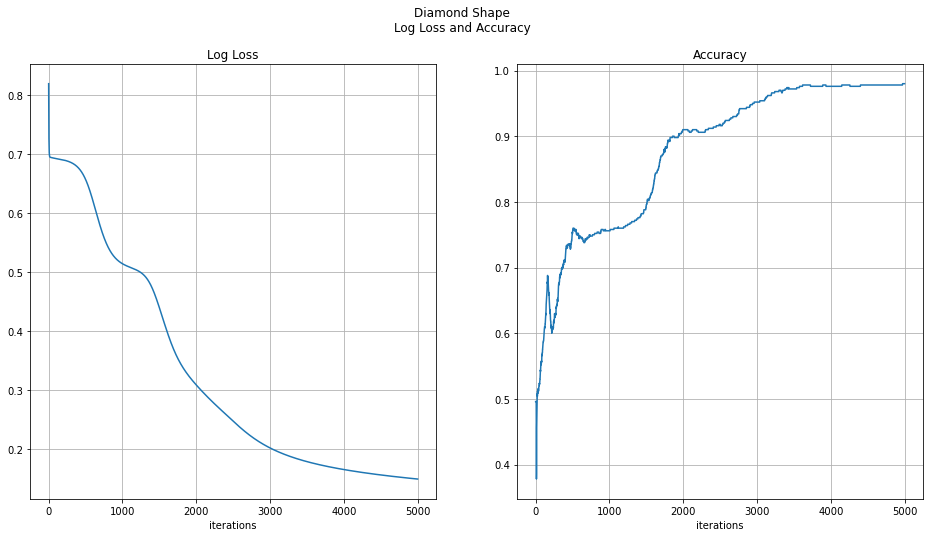

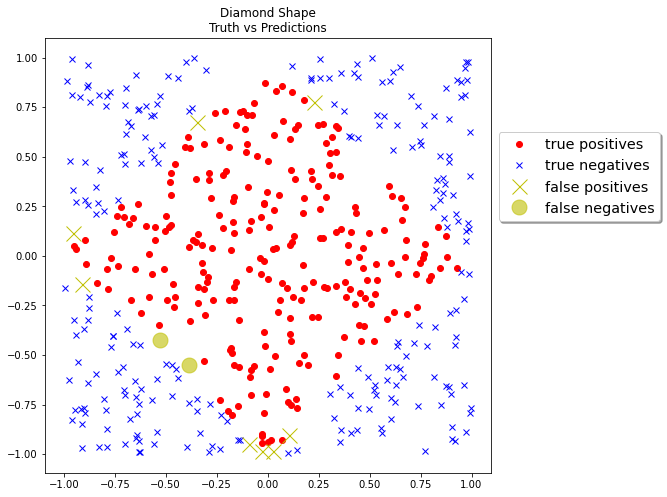

_____________________________________________________________________________________________________________

Fitting Multi-Layer Perceptron for Centered square shape

iteration 0, log loss = 0.5666, accuracy = 0.75
iteration 1000, log loss = 0.4514, accuracy = 0.75
iteration 2000, log loss = 0.2811, accuracy = 0.906
iteration 3000, log loss = 0.1471, accuracy = 0.958
iteration 4000, log loss = 0.1265, accuracy = 0.962


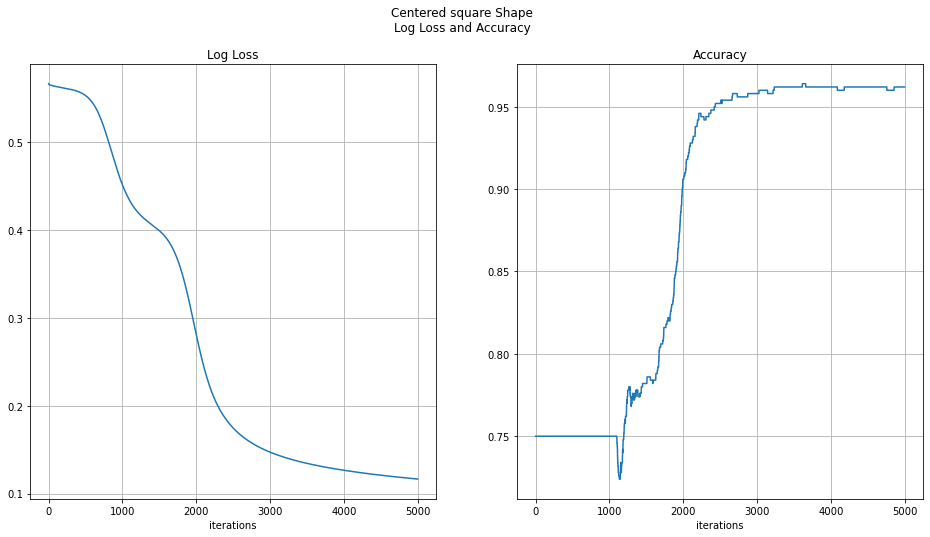

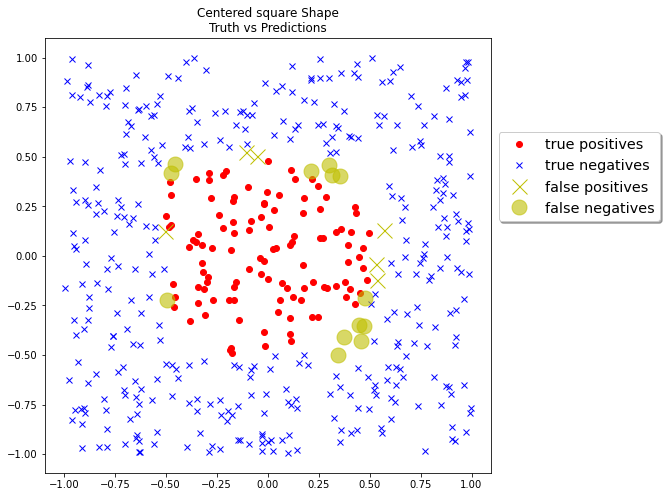

_____________________________________________________________________________________________________________

Fitting Multi-Layer Perceptron for Thick Right Angle shape

iteration 0, log loss = 0.7966, accuracy = 0.494
iteration 1000, log loss = 0.3695, accuracy = 0.886
iteration 2000, log loss = 0.2191, accuracy = 0.926
iteration 3000, log loss = 0.1699, accuracy = 0.95
iteration 4000, log loss = 0.1395, accuracy = 0.96


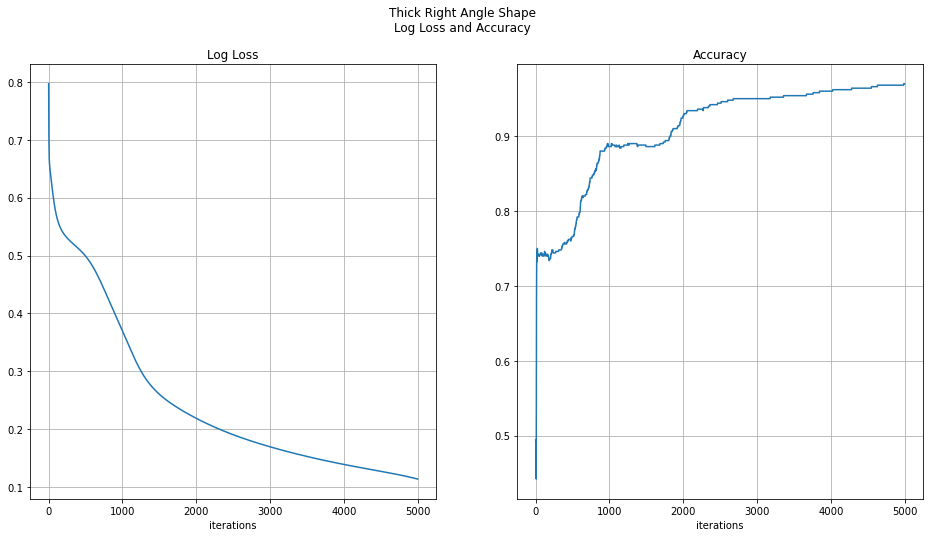

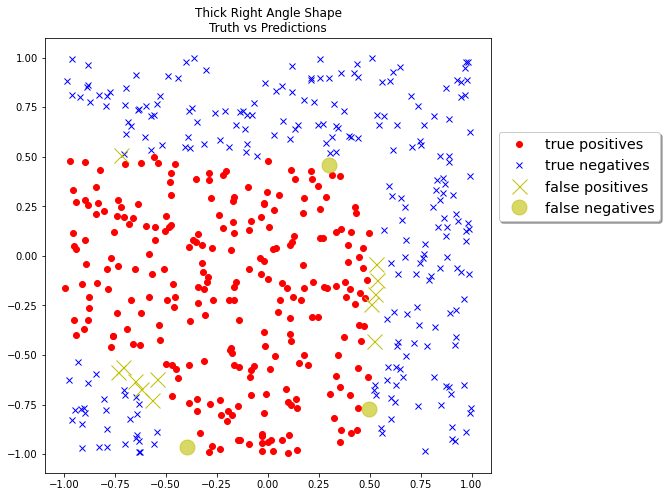

_____________________________________________________________________________________________________________

Fitting Multi-Layer Perceptron for Thin Right Angle shape

iteration 0, log loss = 0.6280, accuracy = 0.684
iteration 1000, log loss = 0.5228, accuracy = 0.684
iteration 2000, log loss = 0.4452, accuracy = 0.778
iteration 3000, log loss = 0.3051, accuracy = 0.876
iteration 4000, log loss = 0.1568, accuracy = 0.98


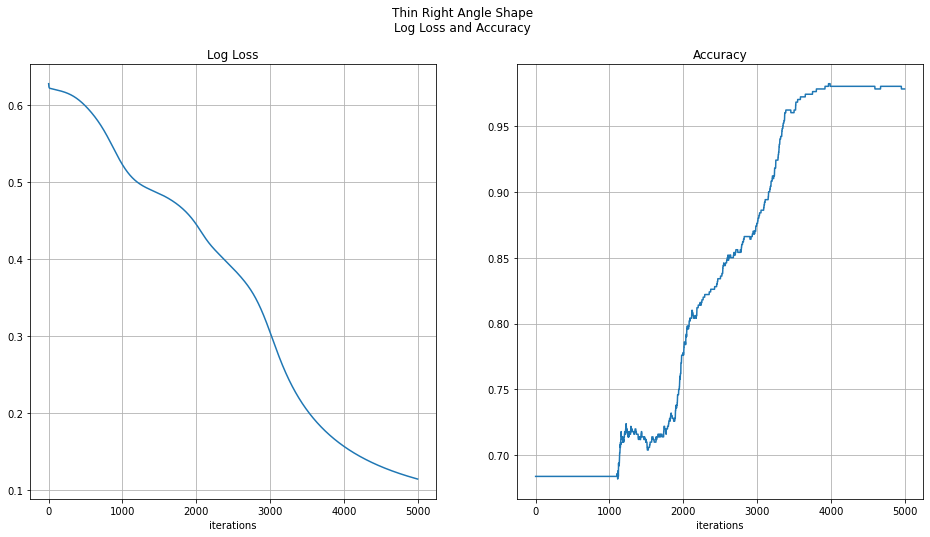

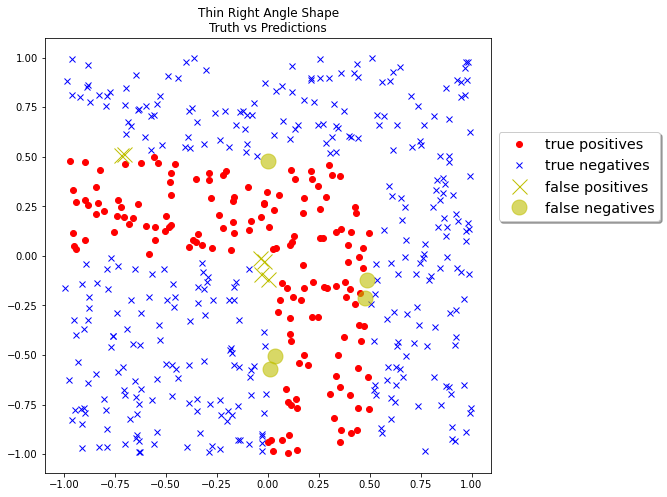

_____________________________________________________________________________________________________________


In [3]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))


def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    # Now compute the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)
    
    # return
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies, shape):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('{} Shape\nLog Loss and Accuracy'.format(shape))
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy')
    plt.show()
    
def plot_preds(y, y_pred, shape):
    
    pred1 = (y_pred>=.5)
    pred0 = (y_pred<.5)
    
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
    ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
    ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
    ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
    ax.set(title='{} Shape\nTruth vs Predictions'.format(shape))
    ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large')
    plt.show()
    
y2=y

for i,j in enumerate(pattern):
    
    print("\nFitting Multi-Layer Perceptron for {} shape\n".format(j))
    
    #### Initialize the network parameters
    np.random.seed(1241)
    y = np.array(y2[i])
    W_1 = np.random.uniform(-1,1,size=(3,4))
    W_2 = np.random.uniform(-1,1,size=(4))
    num_iter = 5000
    learning_rate = .001
    x_mat = x_mat_full

    loss_vals, accuracies = [], []
    for k in range(num_iter):
        
        ### Do a forward computation, and get the gradient
        y_pred, (J_W_1_grad, J_W_2_grad) = forward_pass(W_1, W_2)

        ## Update the weight matrices
        W_1 = W_1 - learning_rate*J_W_1_grad 
        W_2 = W_2 - learning_rate*J_W_2_grad

        ### Compute the loss and accuracy
        curr_loss = loss_fn(y,y_pred)
        loss_vals.append(curr_loss)
        acc = np.sum((y_pred>=.5) == y)/num_obs
        accuracies.append(acc)

        ## Print the loss and accuracy for every 200th iteration
        if((k%1000) == 0):
            print('iteration {}, log loss = {:.4f}, accuracy = {}'.format(
                k, curr_loss, acc
            ))
            
    plot_loss_accuracy(loss_vals, accuracies, shape=j)
    
    # Plot predictions
    plot_preds(y, y_pred, shape=j)
    print('_____________________________________________________________________________________________________________')

---
### Machine Learning Foundation (C) 2020 IBM Corporation